## A Comprehensive Analysis of House Sales Trends in Kings County, California

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

# Introduction

The housing market plays a pivotal role in our economy and the daily lives of individuals and families. Understanding the dynamics of this market can provide valuable insights for buyers, sellers, investors, and policymakers. In this project, we embark on a journey to analyze house sales data in Kings County, California, with the goal of gaining a deeper understanding of the real estate landscape in this region.

Kings County, located in the heart of California's Central Valley, is known for its diverse neighborhoods, proximity to major cities, and a unique blend of rural and urban living. By examining the historical data of house sales in Kings County, I aim to unearth trends, patterns, and valuable insights that can benefit various stakeholders. Our analysis will encompass factors such as property characteristics, location, and pricing trends, shedding light on what drives the local real estate market.

Through this project, I hope to answer critical questions, such as what influences house prices in Kings County, whether there are seasonal trends in sales, and which neighborhoods have shown the most significant growth in property values. By the end of our analysis, I aim to provide a comprehensive overview of the real estate dynamics in Kings County and equip our readers with a wealth of information for making informed decisions in the world of real estate.

Join us on this data-driven exploration of Kings County's real estate market as we delve into the numbers, charts, and insights that unveil the fascinating story of house sales in this vibrant region.


# Installing Required Libraries

In [5]:
# The first step is installing necessary python packages using pip python package manager 
# --user: This option specifies that the package should be installed for the current user only.
!pip3 install scikit-learn --upgrade --user


Now, Let's Import all required Libraries 

In [6]:
 # Pandas is used for data manipulation and analysis. It provides data structures for working with structured data.
import pandas as pd

# NumPy is a fundamental library for numerical and array operations, often used in data processing and scientific computing.
import numpy as np

# Matplotlib is a popular library for creating visualizations and plots from data.
import matplotlib.pyplot as plt

# Seaborn is a data visualization library built on top of Matplotlib. It simplifies the process of creating informative and attractive statistical graphics.
import seaborn as sns

# scikit-learn (sklearn) is a powerful library for machine learning and data analysis. It includes various tools and algorithms for data preprocessing, modeling, and evaluation.
from sklearn.pipeline import Pipeline  # Used for creating data processing pipelines.
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # Preprocessing techniques.
from sklearn.linear_model import LinearRegression  # A machine learning model for regression tasks.



### Now, let's read a csv file that I downloaded from Kaggle into pd dataframe

### checking head of the datafrane to make sure, file details have been read into pd dataframe


In [7]:
file_path = "kc_house_data.csv"
df = pd.read_csv(file_path)

In [8]:
#shapes of the table
df.shape

(21613, 21)

In [9]:
#Name of the attributes
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
# checking datatypes
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [11]:
# checking Summary statistics
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Above, as we can see some valuable statistics about the dataset
1. count: counts calculate the number of non-missing values on each column
2. mean: calculates avg value 
3. std: measures the spread or dispersion of the data from the mean. Larger the std larger the variability
4. 25th percentile: This is the value below which 25% of the data falls. It's also known as the first quartile.
5. 75th Percentile (Q3): This is the value below which 75% of the data falls. It's also known as the third quartile.
6. Median (50th Percentile or Q2): It's the middle value in the sorted data (if there's an odd number of data points) or the average of the two middle values (if there's an even number of data points). It represents the central value of the data distribution.

# Data Wrangling/Cleaning

This step includes cleaning , formating data to  perform EDA.

In [12]:
# checking missing values on each column and count it 
missing_count = df.isna().sum()
duplicated = df.duplicated().sum()
print(missing_count)
print(duplicated)


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
0


In [13]:
# since there are no null values 
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0


In [14]:
# Since there are no missing values, we do not need to replace or remove null values with arbitary numner 
# if there were some missing values, we could have replace bedroom null value with its mean or just dropna()
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [15]:
# converting date column to datetime datatype
df['date'] = pd.to_datetime(df['date'])
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [16]:
# Data Cleaning
# Example: Remove duplicate rows
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis


Let's find out number of houses with different number of floors

In [17]:
# use value_counts() method on "floors" column
unique_floors = df["floors"].value_counts()
# convert resulted floors value to new dataframe with resulted count
new_df = unique_floors.to_frame().reset_index()
new_df.columns = ['floors', 'count']
new_df.head(10)




,floors,count
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8


As we can see that most of the houses are first floor houses 

 There is  high possibility that the houses with the waterfront have some house price outliers.
 Let's see using box plot for both binary values(waterfront 1 or not water front 0)
 

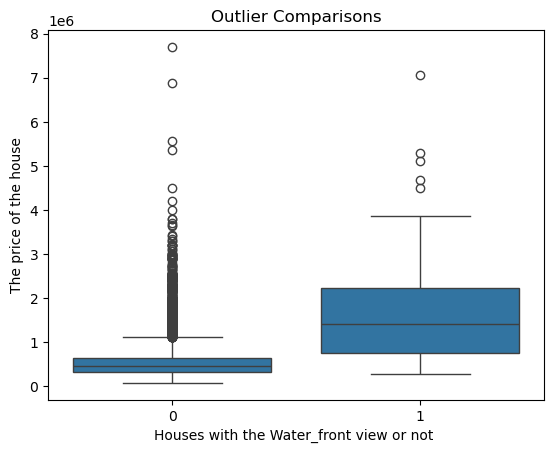

In [18]:
# using seaborn
sns.boxplot(y="price", x="waterfront", data=df)
plt.xlabel("Houses with the Water_front view or not " )
plt.ylabel("The price of the house")
plt.title("Outlier Comparisons")
plt.show()

Outlier Presence: It appears that there are potential outliers with extremely high prices among properties without waterfront. These outliers could be driving up the upper quartile (Q4) and making the box plot for this category look different.  

Variability in Waterfront Prices: The thicker box in the box plot for properties with waterfront suggests greater variability in house prices for these properties. This means that while waterfront properties may command higher prices, there is a wider range of prices within this category.  

Let's also check sqft_above is negatively or positively correlated with  the price of the house using regplot function .


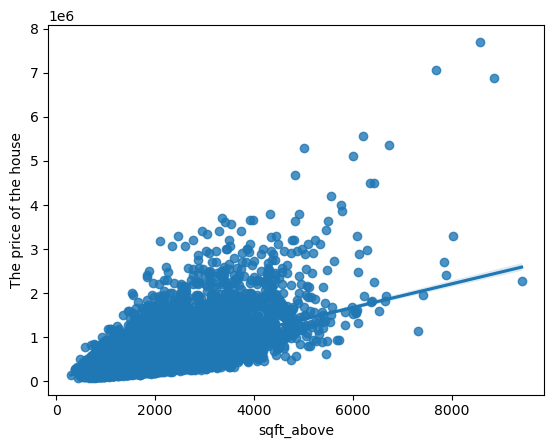

In [19]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.xlabel("sqft_above")
plt.ylabel("The price of the house")
plt.show()

As we can see that there is positive corelation between price and sqft_above features.

In [20]:
# Let's check corelation score
df.corr()["price"].sort_values()


zipcode         -0.053203
id              -0.016762
date            -0.004357
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

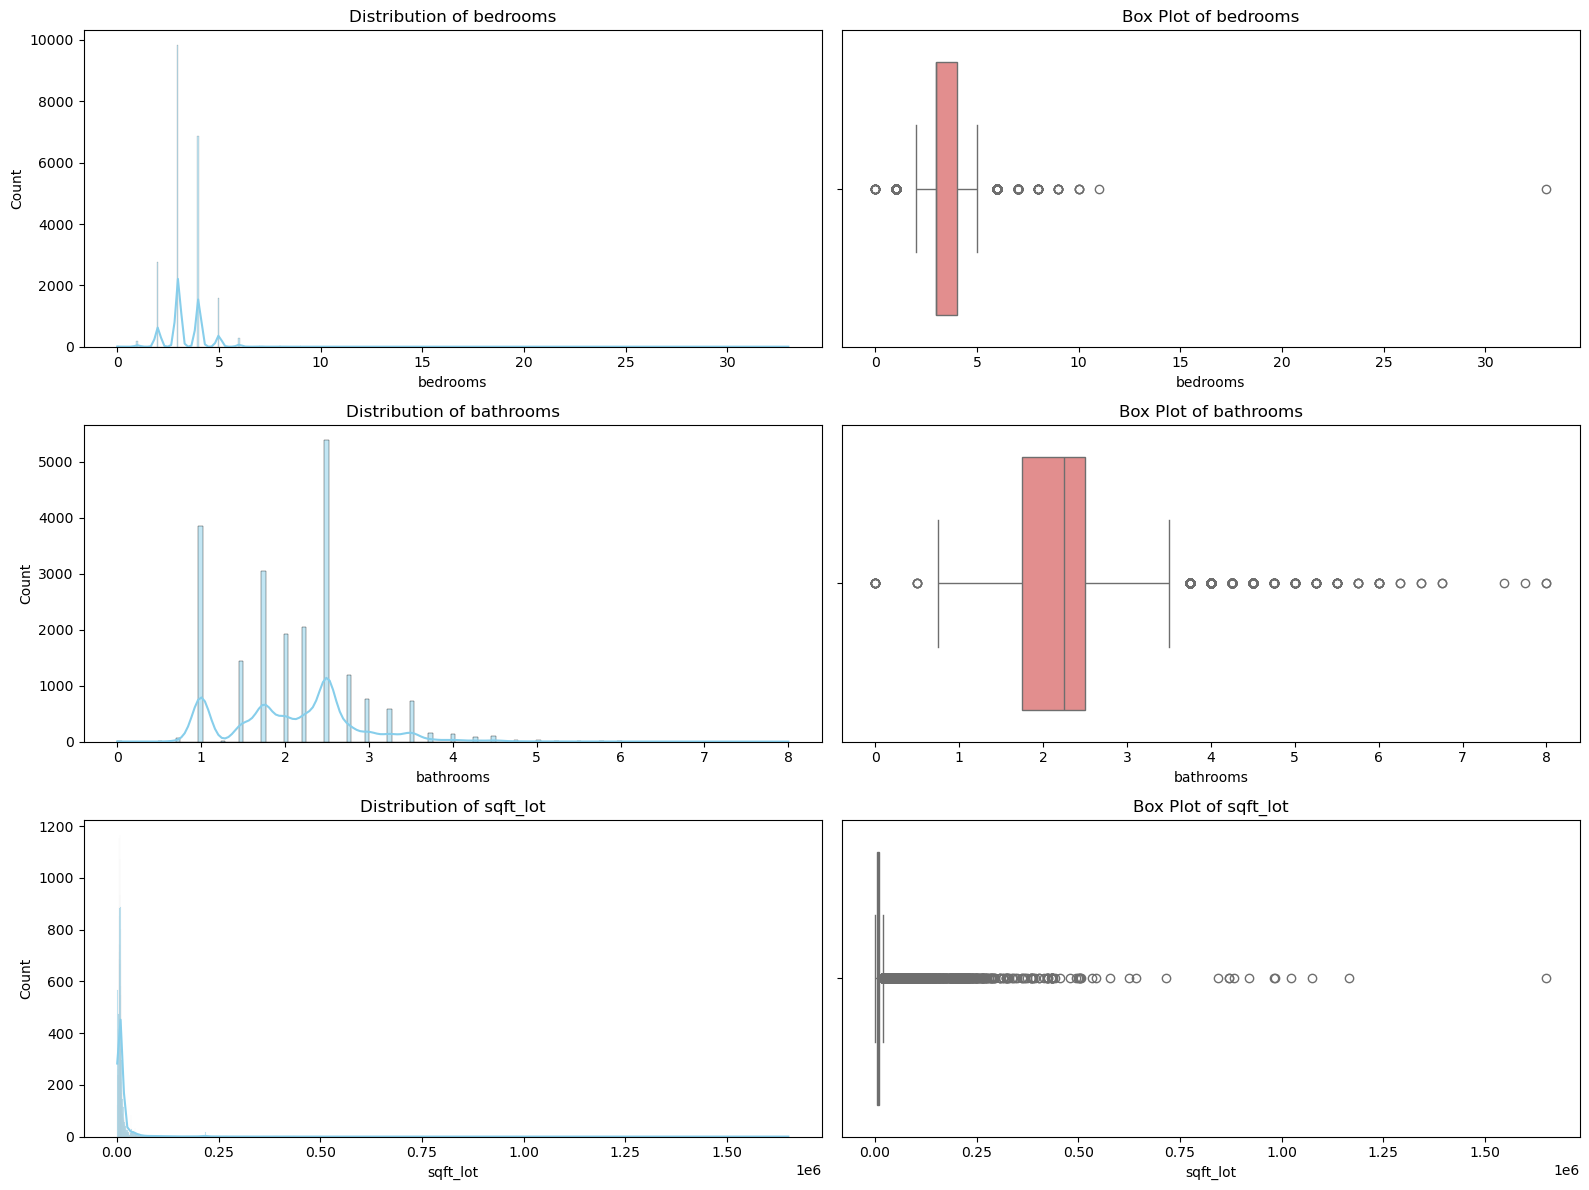

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the features you want to explore
features_to_explore = ["bedrooms", "bathrooms", "sqft_lot"]

# Set up subplots for multiple plots
plt.figure(figsize=(16, 4 * len(features_to_explore)))

# Loop through the selected features and create distribution plots
for i, feature in enumerate(features_to_explore, 1):
    # Create a histogram with a kernel density plot
    plt.subplot(len(features_to_explore), 2, i * 2 - 1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    
    # Create a box plot to visualize quartiles and potential outliers
    plt.subplot(len(features_to_explore), 2, i * 2)
    sns.boxplot(x=feature, data=df, color='lightcoral')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

# Ensure proper spacing of plots
plt.tight_layout()

# Display the plots
plt.show()


/var/folders/ff/b27bg8xd09n88ccm4d4n9y8w0000gn/T/ipykernel_29732/306391955.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')
/var/folders/ff/b27bg8xd09n88ccm4d4n9y8w0000gn/T/ipykernel_29732/306391955.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')
/var/folders/ff/b27bg8xd09n88ccm4d4n9y8w0000gn/T/ipykernel_29732/306391955.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set3')


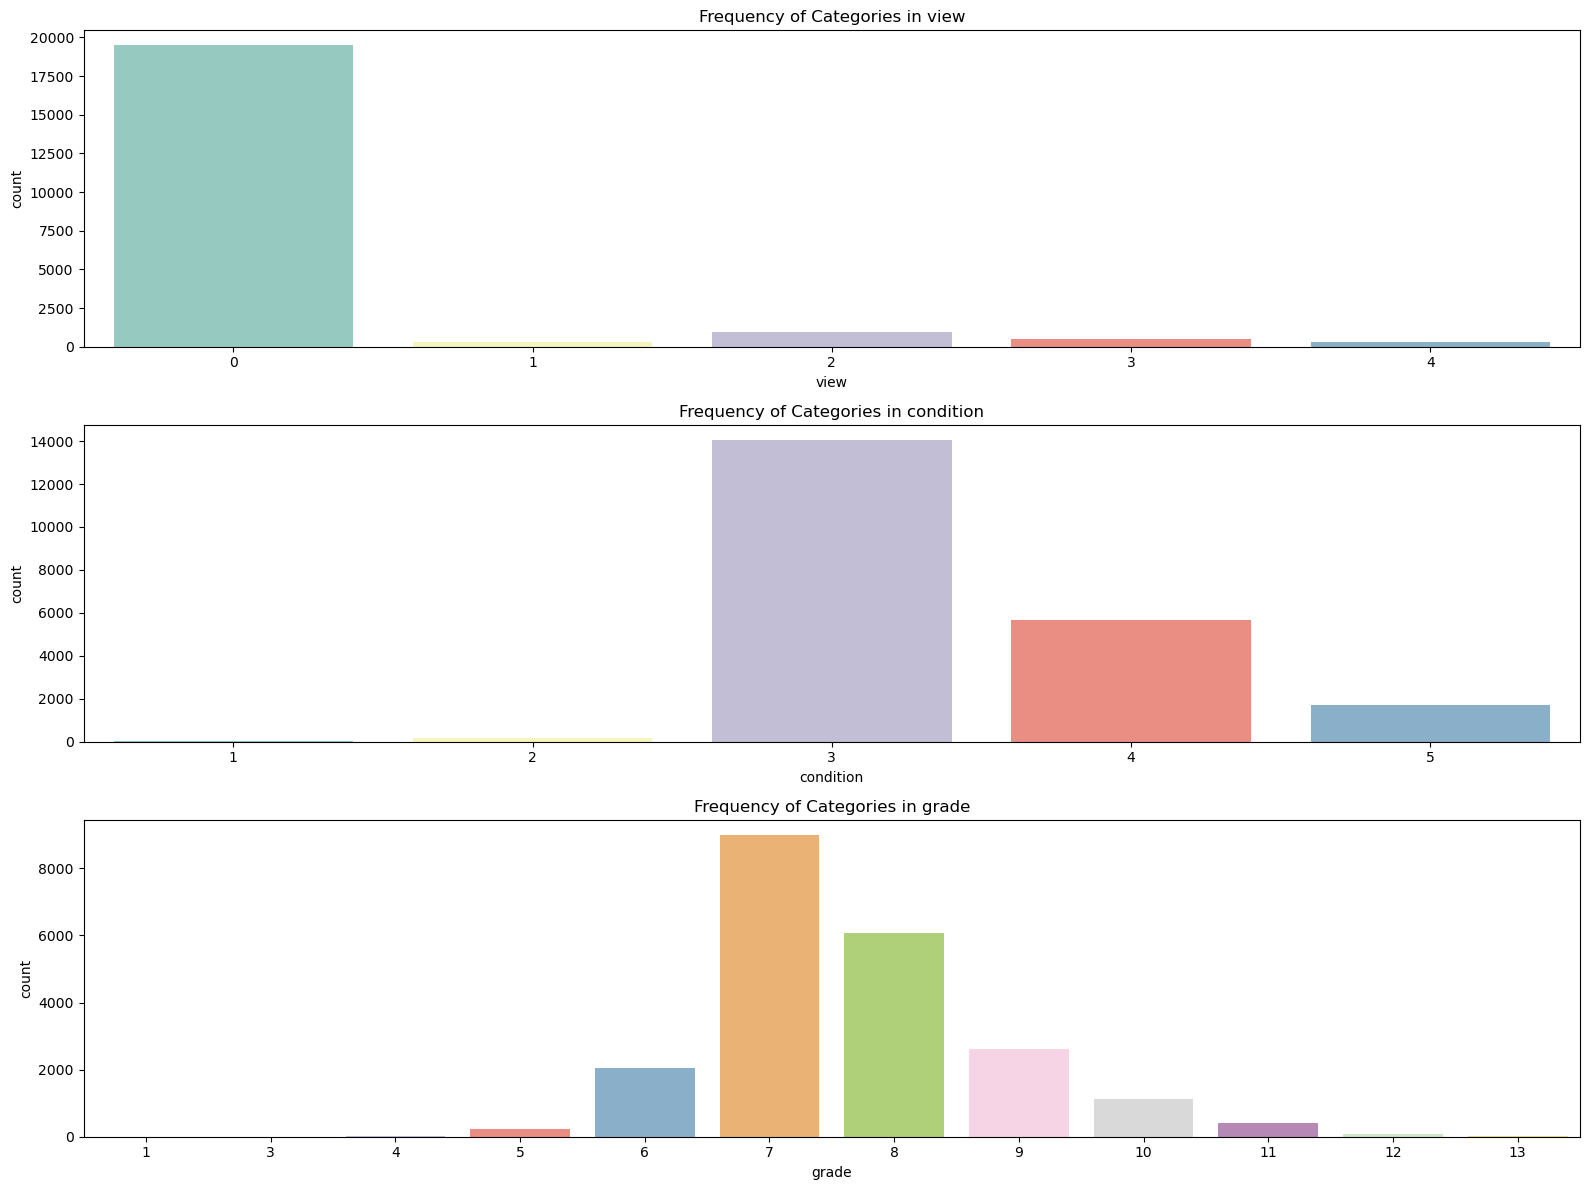

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the categorical features to explore
categorical_features = ['view', 'condition', 'grade']

# Set up subplots for multiple plots
plt.figure(figsize=(16, 4 * len(categorical_features)))

# Loop through the selected categorical features and create count plots
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(data=df, x=feature, palette='Set3')
    plt.title(f'Frequency of Categories in {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


The code generates a set of count plots, with each plot visualizing the frequency of categories within a specific categorical feature. This allows you to explore the distribution of categorical data and gain insights into how the different categories are distributed within each feature.

# Model Development 

Let's first check the Linear Regression Model to the "long" and "price" variables to ensure whether they fit in the linear model or not.

In [23]:

from sklearn.metrics import r2_score


# Step 1: Define the feature 'long' and the target 'price'
X = df[["long"]]# Feature (independent variable), this is df
Y= df["price"]# Target (dependent variable), this is pandas series 



# Step 2: Create a linear regression model Object 
model = LinearRegression()

# Step 3: Fit the model using the feature and target
model.fit(X, Y)

# Step 4: Make predictions using the model
y_pred = model.predict(X)

# Step 5: Calculate the R-squared (coefficient of determination)
r_squared = r2_score(Y, y_pred)

# Step 6: Print the R-squared value
print(f'R-squared (R²) value: {r_squared}')


R-squared (R²) value: 0.00046769430149007363


As we can see above, R2 score is close to 0 rather than 1.
Basically , 
R² is a statistical measure that quantifies how well a linear regression model explains the variance in the target variable. 
The following conclusion we can make.
1. There is a week linear relationship between "long" fature and "price" feature of the house.
2. The model does not provide perfect fit to the data.
3. Very little  variance in the house price.
4. It implies that other factors or features are likely more important in determining house prices, and the 'long' feature, by itself, is not a strong predictor of price in this dataset.

Similarly, Let's check to some other important fatures what is their R^2 score.

Let's check with "sqft_living" feature

In [24]:
# same as above
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)


0.4928532179037931

As you can see that R2 value is 0.49,
1. It means that there is moderate linear relationships between these two fatures .
2. Also, variance 49 % of the actual house prices.
3. However, it also implies that there is still a significant amount of unexplained variance in house prices that is not accounted for by the 'sqft_living' feature alone. Other factors or features not included in the model may be contributing to this unexplained variance.


Let's Eplore further by selecting multiple features in a matrix

In [25]:
from sklearn.metrics import r2_score
# Let's create a python list to store the selected feature names
selected_features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
# define X and Y
# X - feature matrix(independent var)
X = df[selected_features]
Y = df["price"]

#  Now, create a linear regression moodel object 
model = LinearRegression()
 
 # fit X and Y into the model
 
model.fit(X, Y)
 
 # predict the outcome
Yhat = model.predict(X)
r2_score = r2_score(Y, Yhat)
 # calculte R2 score
print(f"R2 error using above features is:  {r2_score}")
 
 



R2 error using above features is:  0.6577151058279325


 We are literally improving the R2 value as we selected the right parameters.
 R2 is 0.65 means the following: 
 1. An R² value of 0.65 falls closer to 1, which means the model is explaining a significant portion of the variance in the house prices. Specifically:
 2. variance 65%  in the house prices.
 3. These featrues are collectively quite effective in explaining variations in house prices.

### Pipelining
Now, Let's Create a Pipeline Object  pipeline is a sequence of data processing components, where each component is a transformer or an estimator (a model).
Pipelines are used to streamline the machine learning workflow by specifying a series of processing steps in a clear and organized manner.

### The Transformers
Transformers are used to preprocess and manipulate data before it's fed into a machine learning model. They can perform operations such as scaling, encoding, feature engineering, and more.
Common transformers in scikit-learn include StandardScaler for feature scaling, OneHotEncoder for encoding categorical variables, and PolynomialFeatures for generating polynomial features.

### Feature Engineering 
Feature Engineering: Feature engineering is the process of creating new features, transforming existing features, or selecting relevant features to improve a machine learning model's performance. It involves tasks such as binning, scaling, creating interaction terms, and generating new features based on domain knowledge

In [26]:


# Define the pipeline with transformers and the model
# we are crating Pipeline cunstructor 
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])

# Specify the features (X) and target (y)
X = df[selected_features]
y = df["price"]

# Fit the pipeline to the data
pipeline.fit(X, y)

# Calculate the R-squared (coefficient of determination)
r_squared = pipeline.score(X, y)

# Print the R-squared value
print(f"R-squared score: {r_squared}")


R-squared score: 0.7513485028640352


As we can see above that an R-squared (R²) value of 0.75, after applying a pipeline with preprocessing steps and a linear regression model, indicates the goodness of fit of the model to the data.

# Model Evaluation and Refinement

Model evaluation is an important steps to check the performance of the model.
We can check model performance using, cross-validation, and domain-specific knowledge.


In [27]:
from sklearn.model_selection import cross_val_score # more robust way of evaluation matrix
from sklearn.model_selection import train_test_split # more sraightforward


In [28]:
# Let's do train_test_Split first

selected_features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[selected_features]
Y = df["price"]
 
 # using train_test_Split function 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.15, random_state=1)
 
 # Let's check the number of rows used for training and testing
 # shape is a tuple with two elements: (number of rows, number of columns)
print("The number of training rows used : ", Xtrain.shape[0])
print("The number rows used for testing set: ", Xtest.shape[0])
print("The number of columns:  ", len(Ytrain))

The number of training rows used :  18371
The number rows used for testing set:  3242
The number of columns:   18371


## Let's Understand two Regularization Techniques in Machine Learning 
L1 Regularization (Lasso):

L1 regularization adds the absolute values of the coefficients (parameters) as a penalty term to the loss function.
The loss function for Lasso regression is modified to include a term that encourages some of the coefficients to become exactly zero. As a result, L1 regularization can be used for feature selection as well as reducing overfitting.
Lasso regression is particularly effective when dealing with high-dimensional data with many features. It tends to produce sparse models by setting some feature coefficients to zero.

L2 Regularization (Ridge):
L2 regularization adds the squared values of the coefficients as a penalty term to the loss function.Ridge regression encourages the model to have smaller and more evenly distributed coefficients. It doesn't usually lead to sparsity, as it keeps all features in the model, but with reduced weight.
Ridge regularization helps in handling multicollinearity (correlation between features) and generally improves the stability of the model.

Note:
The coefficients determines the rate of change of Y(target) when one unit change in X(dependent variables)

Formula:
Target = Intercept + Coefficient₁ * Feature₁ + Coefficient₂ * Feature₂ + ... + Coefficientₙ * Featureₙ

Intercept: This is a constant term that represents the predicted value of the target when all the features are zero. It's essentially the starting point on the target axis.

Coefficient₁, Coefficient₂, ..., Coefficientₙ: These are the parameters that represent how much the target variable is expected to change for a one-unit change in the corresponding feature, while holding all other features constant.

In [29]:
# Let's use Ridge Regression Model, which helps us to prevent overfitting by adding 
# a penalty term to the model's loss function(error) that discourages large values for the model's coefficients or weights.
 
from sklearn.linear_model import Ridge
 # let's call ridge object 
ridge = Ridge()

# set the regularization term
# which helps us to prevent overfitting

ridge.set_params(alpha= 0.1)
# fit the data into model
ridge.fit(Xtrain, Ytrain)

# R2 score of the model
ridge.score(Xtest, Ytest)







0.6480374087702243

As we can see, the R2 is score is lower than the previus pipeline model. 

 Now,
 let's transform the model using 2nd degree Polynomial transformer and use again Ridge regularization techinque with alpha is 0.1 again.

In [30]:
# Create a Ridge Regression model
poly_transformer = PolynomialFeatures(degree=2)
X_train_poly = poly_transformer.fit_transform(Xtrain)
X_test_poly = poly_transformer.transform(Xtest)
reg_model = Ridge(alpha=0.1)
reg_model.fit(X_train_poly,Ytrain )
r_sqared = reg_model.score(X_test_poly, Ytest)
r_sqared

0.7004432066573696

As we can see that , an R² score of 0.70 indicates that the Ridge regression model, with a second-order polynomial transformation and a regularization parameter of 0.1, explains 70% of the variance in the test data. This means that the model provides a reasonably good fit to the data, capturing 70% of the variation in the target variable.



## Let's Try Crosss Validation techniques to measure performance of the model
Cross-validation provides a more comprehensive evaluation by splitting the dataset into multiple subsets (folds) and performing training and testing on different combinations of these subsets. One common cross-validation technique is k-fold cross-validation.



In [31]:
from sklearn.model_selection import cross_val_score

# Create a Ridge Regression model
poly_transformer = PolynomialFeatures(degree=2)
X_poly = poly_transformer.fit_transform(X)
reg_model = Ridge(alpha=0.1)

# Perform k-fold cross-validation (e.g., 5-fold)
k = 5
cross_val_scores = cross_val_score(reg_model, X_poly, Y, cv=k, scoring='r2')

# Calculate the mean R² score and its standard deviation
mean_r_squared = cross_val_scores.mean()
std_r_squared = cross_val_scores.std()

print("Mean R^2 score:", mean_r_squared)
print("Standard Deviation of R^2 scores:", std_r_squared)


Mean R^2 score: 0.717422178721704
Standard Deviation of R^2 scores: 0.021688229501594065


From above what we can coonclude that , the mean R² score is approximately 0.717, which means that, on average, the model explains about 71.7% of the variance in the target variable across the cross-validation folds.
Also,  a smaller standard deviation indicates that the model's performance is consistent across different subsets of the data.


# The conclusion

In conclusion, our Ridge regression model, enhanced with polynomial features and assessed through cross-validation, provides a reliable method for estimating house prices in Kings County, California. The mean R² score of 0.717 suggests that our model captures a substantial portion of the variance in house prices, and the low standard deviation indicates consistent performance across different data subsets.

Our EDA findings provided valuable insights into the factors influencing house prices, allowing us to identify key drivers of price variations. This project showcases the power of machine learning in real estate price prediction and provides a foundation for future improvements and refinements.